<a href="https://colab.research.google.com/github/hiephamk/Data_Analysis/blob/Khanh-Chi/GroupHCDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis & Visualization - Project Work (Team HCDA)

## Introduction & Objective

We selected dataset from Kaggle: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023 on 15 Nov 2023. The information this dataset was most likely gathered by scraping job postings from ai-jobs.net.

We aim to use this dataset to analyze salaries for various data science roles, factoring in key variables like experience, location, and job specifics. This offers insights into potential earnings across different domains that influence data science salaries. For example, it can be used to address the following questions:

1. Which are the top 10 jobs with the highest salary for juniors in 2023?
2. What is the mean annual salary of each job title in small-sized companies in the US?
3. How does the average income for the Analytics Lead job vary by experience level?

For those embarking on the data science journey, these observations are like having a crystal ball. It enables informed decision-making and strategic job hunting, thereby setting realistic salary expectations.

# 1. Data Preprocessing

**Activities:**
- Select a dataset to work on and understand your dataset. Your activities may include tasks such as viewing a random sample of data, getting the total number of rows and columns.
- Check to see if your dataset contains any missing values and get the percentage of the missing data. Within the context of your dataset, decide what to do with the missing values and take necessary steps.
Identify and drop duplicate values from the dataset.
- Separate one of your columns in the dataset that contains continuous numeric data into appropriate bins. You may use cut or qcut function.
- Identify any outliers within your dataset. If the dataset does not include any outlier, you can randomly mess up some portion of your data.
Decide what to do with the outliers.

**Assessment:**
- Understanding the Dataset (1 point): Demonstrates a basic understanding of the selected dataset by performing tasks like viewing a random sample, determining the total number of rows and columns.
- Handling Missing Values (1 point): Identifies and addresses missing values effectively, providing a clear strategy for handling them.
- Handling Duplicates (1 point): Detects and removes duplicate values from the dataset, ensuring data cleanliness.

**Notes to get teacher's advise**
- What should we do if there is no missing values in our data set?
- Same with duplicated values
- There is no binary value either, can we make assumption on a specific column? Or should we run the command & show the null result?

### Data Exploration

In [4]:
# Import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', DeprecationWarning)

In [5]:
# Load raw data
#from google.colab import data_table
url = 'https://raw.githubusercontent.com/hiephamk/Data_Analysis/main/ds_salaries.csv'
salary = pd.read_csv(url,sep = ',')

In [6]:
# Preview the first 10 lines of the loaded data
salary.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [7]:
# View a random dataset of data
sample = salary.sample(5)
sample

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2207,2022,SE,FT,Data Engineer,230000,USD,230000,US,0,US,L
376,2023,SE,FT,Data Analytics Manager,120000,USD,120000,US,100,US,M
1756,2023,SE,FT,Research Engineer,100000,USD,100000,US,0,US,M
2118,2020,MI,FT,Business Data Analyst,95000,USD,95000,US,0,US,M
866,2023,SE,FT,Data Scientist,149076,USD,149076,US,0,US,M


Now we need to know how many rows and columns are there in the data set, what variables it has, the data types of the variables and the range of values they take on.

In [8]:
# Viewing data type and getting the total number of rows and columns
print(salary.info())
salary.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
None


(3755, 11)

As we can see from the above data frame information, there are 3755 rows, 11 columns, and no missing values in this dataset since all fields has 3755 non-null entries.

However, we could check again to assure if there are some missing values in the data set.

In [9]:
# Check missing values
missing_values = salary.isnull().sum()
print(missing_values)

# Calculate the missing percentage
total_values = np.product(salary.shape)
percentage = (missing_values / total_values) * 100
print(percentage)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64


As per the above result, we now can ensure that our data set has no missing value.

### Data Transformation

#### Unnecessary data drop

Firstly, out of 3,755 observations in the dataset, there are only over 700 data values from other nations besides the US. Since this data may not be meaningfully contributing to useful analysis, we decide to exclude these data and retain only the data values from the US.

In [10]:
# Filter data values to keep the US country only
df_salary1 = salary[salary['company_location'] == 'US']
df_salary1.shape

(3040, 11)

Now that we only have one country in the data, we do not need 2 features "company_location" and "employee_residence" because all employees who work for a company based in the US also live in the US. So we will drop them for a cleaner data set.

Besides, the "salary" and "salary_currency" features will also be removed. We saw that there are 3 features relevant to salary: "salary", "salary_currency", and "salary_in_usa". However, we will primarily focus on the "salary_in_usd" feature because it provides a standardized currency for easy comparisons.

In [11]:
# Drop 2 columns 'company_location' and 'employee_residence'
df_salary2 = df_salary1.drop(columns=['company_location', 'employee_residence'])
df_salary2.shape

(3040, 9)

In [12]:
# Drop 2 columns: 'salary' and 'salary_currency'
df_salary3 = df_salary2.drop(['salary','salary_currency'], axis=1)
df_salary3.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,MI,CT,ML Engineer,30000,100,S
2,2023,MI,CT,ML Engineer,25500,100,S
5,2023,SE,FT,Applied Scientist,222200,0,L
6,2023,SE,FT,Applied Scientist,136000,0,L
9,2023,SE,FT,Data Scientist,147100,0,M


In [13]:
# Check the number of rows and columns of the latest dataset
df_salary3.shape

(3040, 7)

As observed, there are limited number of data values for the year 2020, 2021 (which are only account for over 130 out of 3,040 observations) in the latest data set. These data may not contribute significantly to our analytic, so we will exclude it in the final data set.

In [14]:
# Filter data without values of years 2020 and 2021
df_salary = df_salary3[(df_salary3['work_year'] != 2020) & (df_salary3['work_year'] != 2021)]
df_salary.shape

(2909, 7)

Finally, our data set now has 2909 rows and 7 columns in total.

#### Duplicated values

We are going to identify and remove duplicated values (if any) in order to smooth our data set.

In [55]:
# Check duplicate values
dup_value = df_salary.duplicated()
# Find the number of duplicate values
dup_value_count = dup_value.value_counts()
dup_value_count

False    1798
True     1111
Name: count, dtype: int64

The result shows that there are 1111 duplicated entries in our final dataset. Before dropping them, we will display some of these duplicated values to see if they are valid to assure that we don't make any mistake here.

In [56]:
# Show some rows of duplicate values to investigate
df_salary[dup_value].head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,salary_range_bin
115,2023,Senior,Full-time,Data Scientist,150000,Office work,Medium,150k-200k
123,2023,Senior,Full-time,Analytics Engineer,289800,Office work,Medium,200k-410k
153,2023,Mid-level,Full-time,Data Engineer,100000,Fully remote,Medium,100k-150k
154,2023,Mid-level,Full-time,Data Engineer,70000,Fully remote,Medium,50k-100k
160,2023,Senior,Full-time,Data Engineer,115000,Office work,Medium,100k-150k
163,2023,Senior,Full-time,Applied Scientist,309400,Office work,Large,200k-410k
164,2023,Senior,Full-time,Applied Scientist,159100,Office work,Large,150k-200k
167,2023,Mid-level,Full-time,Data Engineer,162500,Office work,Medium,150k-200k
168,2023,Mid-level,Full-time,Data Engineer,130000,Office work,Medium,100k-150k
171,2023,Senior,Full-time,Data Engineer,145000,Office work,Medium,100k-150k


After manually examining the above duplicated values, we found that each of the duplicates had unique values in the "salary_in_usd" feature. Hence, we concluded that all of these duplicate entries are invalid observations, and none of them will be removed.

#### Distinct values

In [16]:
# Count distinct values of each column
year_no = df_salary.work_year.unique()
year_unique = df_salary.work_year.nunique()
year_no

experience_level = df_salary.experience_level.unique()
experience_unique = df_salary.experience_level.nunique()

empl_type = df_salary.employment_type.unique()
empl_unique = df_salary.employment_type.nunique()
empl_type

job_title = df_salary.job_title.nunique()
job_title

salary_usd = df_salary.salary_in_usd.unique()
salaryusd_unique = df_salary.salary_in_usd.nunique()

min_salary = df_salary['salary_in_usd'].min()
max_salary = df_salary['salary_in_usd'].max()
salary_range = [min_salary, max_salary]
salary_range

r_ratio = salary.remote_ratio.unique()
rratio_unique = salary.remote_ratio.nunique()
r_ratio

co_size = salary.company_size.unique()
cosize_unique = salary.company_size.nunique()
co_size

distinct_values = pd.DataFrame(columns=["fields", "count_of_distinct_values", "values"])
distinct_values["fields"] = df_salary.columns
distinct_values["count_of_distinct_values"] = [year_unique,experience_unique,empl_unique,job_title,salaryusd_unique,rratio_unique,cosize_unique]
distinct_values["values"] = [year_no,experience_level,empl_type,"There are 61 distinct job titles",salary_range,r_ratio,co_size]
distinct_values

,fields,count_of_distinct_values,values
0,work_year,2,"[2023, 2022]"
1,experience_level,4,"[MI, SE, EN, EX]"
2,employment_type,4,"[CT, FT, PT, FL]"
3,job_title,61,There are 61 distinct job titles
4,salary_in_usd,645,"[12000, 405000]"
5,remote_ratio,3,"[100, 0, 50]"
6,company_size,3,"[L, S, M]"


In [17]:
unique_counts = df_salary.nunique(axis=0)

def valuesGet():
    unique_values_list = []
    for col_name in unique_counts.index:
        values_get = df_salary[col_name].unique()
        unique_values_list.append(values_get)
    return unique_values_list

unique_values = valuesGet()

df2 = pd.DataFrame({'Values_set': unique_values})

df1 = pd.DataFrame({'Column_name': unique_counts.index, 'Values_Count': unique_counts.values})
unique_show =pd.concat([df1,df2],axis=1)
unique_show


,Column_name,Values_Count,Values_set
0,work_year,2,"[2023, 2022]"
1,experience_level,4,"[MI, SE, EN, EX]"
2,employment_type,4,"[CT, FT, PT, FL]"
3,job_title,61,"[ML Engineer, Applied Scientist, Data Scientis..."
4,salary_in_usd,645,"[30000, 25500, 222200, 136000, 147100, 90700, ..."
5,remote_ratio,3,"[100, 0, 50]"
6,company_size,3,"[S, L, M]"


#### Replace values
According to the above distinct values and source inspection, we can decribe the distinct values of several fields as following:

**1. Experience Level:** 4 unique values
- EN: Entry-level / Junior
- MI: Mid-level / Intermediate
- SE: Senior-level / Expert
- EX: Executive-level / Director

**2. Employee Type:** 4 categories
- PT: Part-time
- FT: Full-time
- CT: Contract
- FL: Freelance

**3. Remote Ratio:** 3 numerical values
- 0: Office work
- 50: Partial remote
- 100: Fully remote

**4. Company Size:** 3 unique values
- S: Small-sized company
- M: Medium-sized company
- L: Large-sized company

Now let's replace these abbreviations with the descriptions for easy understanding.

In [18]:
# Replace the abbreviations
df_salary['experience_level'] = df_salary['experience_level'].replace(['EN','MI','SE','EX'], ['Entry-level','Mid-level','Senior','Executive'])
df_salary['employment_type'] = df_salary['employment_type'].replace(['FT','PT','CT','FL'], ['Full-time','Part-time','Contract','Freelance'])
df_salary['remote_ratio'] = df_salary['remote_ratio'].replace([0,50,100], ['Office work','Partial remote','Fully remote'])
df_salary['company_size'] = df_salary['company_size'].replace(['S', 'M', 'L'], ['Small', 'Medium', 'Large'])

In [19]:
# Show 5 first rows of the final data set
df_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size
1,2023,Mid-level,Contract,ML Engineer,30000,Fully remote,Small
2,2023,Mid-level,Contract,ML Engineer,25500,Fully remote,Small
5,2023,Senior,Full-time,Applied Scientist,222200,Office work,Large
6,2023,Senior,Full-time,Applied Scientist,136000,Office work,Large
9,2023,Senior,Full-time,Data Scientist,147100,Office work,Medium


#### Discretization & Bining

We decide using "salary_in_usd" feature to do bining since this column contains numerical values representing the salaries in USD and by grouping these values into discrete categories, it will be useful to have an overview on the salary range.

Before creating the salary bin, we need to know its minimum and maximum amount so that we can determine the first and last value of the bin.

# TO BE DISCUSSED WITH GROUP: Why choosing 6 bins to split these values into?

In [21]:
# Get the minimum salary
min_salary = df_salary['salary_in_usd'].min()
min_salary

12000

In [22]:
# Get the maximum salary
max_salary = df_salary['salary_in_usd'].max()
max_salary

405000

Then, we start creating the salary bin using cut function.

In [42]:
# Divide the 'salary_in_usd' column into 6 bins with labels
bins = [12000,30000,50000,100000,150000,200000,410000]
labels = ['12k-30k','30k-50k','50k-100k','100k-150k','150k-200k','200k-410k'] 
salary_range_bins = pd.cut(df_salary['salary_in_usd'], bins = bins, labels = labels, right = False)
salary_range_bins

1         30k-50k
2         12k-30k
5       200k-410k
6       100k-150k
9       100k-150k
          ...    
3479    100k-150k
3482    100k-150k
3486    100k-150k
3490    100k-150k
3493    100k-150k
Name: salary_in_usd, Length: 2909, dtype: category
Categories (6, object): ['12k-30k' < '30k-50k' < '50k-100k' < '100k-150k' < '150k-200k' < '200k-410k']

In [57]:
# Let's count the values of each bin
pd.value_counts(salary_range_bins)

salary_in_usd
[100000, 150000)    1119
[150000, 200000)     840
[200000, 410000)     545
[50000, 100000)      383
[30000, 50000)        15
[12000, 30000)         7
Name: count, dtype: int64

#### Outliers

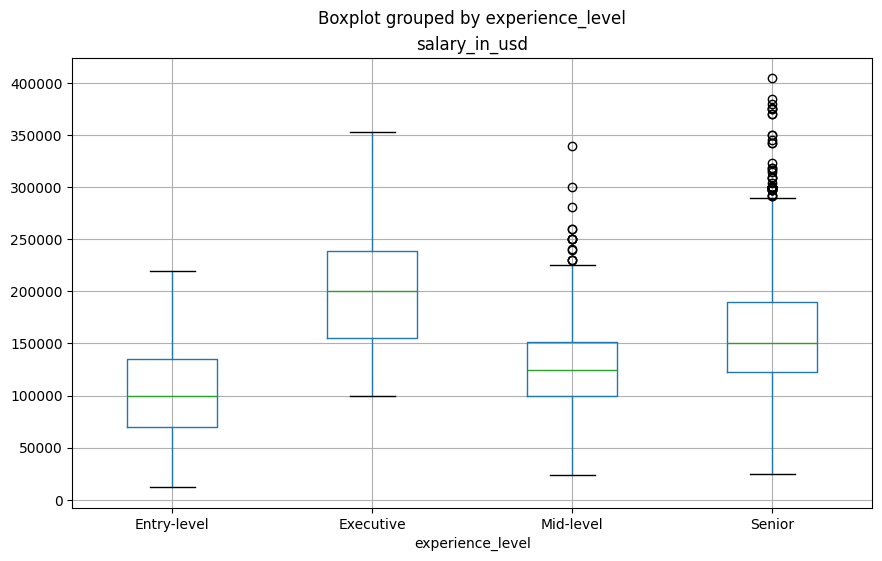

In [66]:
# Define outliers by using Boxplot
df_salary.boxplot(column='salary_in_usd', by='experience_level', figsize=(10,6))
plt.show()

In [71]:
exe_level = df_salary[df_salary['experience_level'] == 'Executive']
df3 = exe_level.sort_values(by='salary_in_usd', ascending=False)
df3

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,salary_range_bin
478,2023,Executive,Full-time,Director of Data Science,353200,Office work,Medium,200k-410k
228,2023,Executive,Full-time,Head of Data,329500,Office work,Medium,200k-410k
3410,2022,Executive,Full-time,Data Engineer,324000,Fully remote,Medium,200k-410k
1396,2023,Executive,Full-time,Head of Data Science,314100,Office work,Medium,200k-410k
1932,2022,Executive,Full-time,Data Engineer,310000,Fully remote,Medium,200k-410k
...,...,...,...,...,...,...,...,...
3275,2022,Executive,Full-time,Data Analyst,110000,Fully remote,Medium,100k-150k
1375,2023,Executive,Full-time,Data Engineer,110000,Office work,Medium,100k-150k
275,2023,Executive,Full-time,Data Engineer,110000,Office work,Medium,100k-150k
798,2023,Executive,Full-time,Data Engineer,106500,Office work,Medium,100k-150k


In [74]:
high_salary = df_salary[df_salary['salary_in_usd'] >= 353000]
high_salary_entries = high_salary.sort_values(by='experience_level', ascending=False)
high_salary_entries

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,salary_range_bin
649,2023,Senior,Full-time,Data Architect,376080,Fully remote,Medium,200k-410k
1105,2023,Senior,Full-time,Data Scientist,370000,Office work,Medium,200k-410k
1258,2022,Senior,Full-time,Machine Learning Software Engineer,375000,Fully remote,Medium,200k-410k
1288,2023,Senior,Full-time,Data Analyst,385000,Office work,Medium,200k-410k
1311,2023,Senior,Full-time,Research Scientist,370000,Office work,Medium,200k-410k
2359,2022,Senior,Full-time,Data Science Tech Lead,375000,Partial remote,Large,200k-410k
3463,2022,Senior,Full-time,Data Analytics Lead,405000,Fully remote,Large,200k-410k
3468,2022,Senior,Full-time,Applied Data Scientist,380000,Fully remote,Large,200k-410k
478,2023,Executive,Full-time,Director of Data Science,353200,Office work,Medium,200k-410k


In [68]:
highest_salary = df_salary[df_salary['salary_in_usd'] == 405000]
highest_salary.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,salary_range_bin
3463,2022,Senior,Full-time,Data Analytics Lead,405000,Fully remote,Large,200k-410k


### 2. Data Objects & Attribute Types

**Activities:**
- Use your dataset and print columns name that represent nominal attributes.
- Use your dataset and print columns name that represent binary attributes.
- Use your dataset and print columns name that represent ordinal attributes.

**Assessment:**
- Nominal Attributes (0.5 points): Accurately identifies and prints the column names representing nominal attributes.
- Binary Attributes (0.25 points): Accurately identifies and prints the column names representing binary attributes.
- Ordinal Attributes (0.25 points): Accurately identifies and prints the column names representing ordinal attributes.

###  Create a medthod to print data_attributes as a list

In [26]:
def Data_print(input_data):
  for i, col in enumerate(input_data):
    print(i,col)

### Printing columns name that represent nominal attributes.

In [27]:
print("Nominal Atribute columns:\n")
Nominal_col = df_salary.loc[:, df_salary.columns != 'salary_in_usd']
Data_print(Nominal_col)

Nominal Atribute columns:

0 work_year
1 experience_level
2 employment_type
3 job_title
4 remote_ratio
5 company_size


###  Printing columns name that represent binary attributes.

In [28]:
Binary_col = salary.columns[salary.isin([0, 1]).all()]

if not Binary_col.empty:
    print("Binary Atribute columns:\n")
    for i, col in enumerate(Binary_col):
        print(i, col)
else:
    print("There are no binary columns in the data frame.")

There are no binary columns in the data frame.


### Printing columns name that represent ordinal attributes.

In [29]:
print("Ordinal Atribute columns:\n")
Ordinal_col = df_salary[['experience_level','salary_in_usd','company_size']]
Data_print(Ordinal_col)

Ordinal Atribute columns:

0 experience_level
1 salary_in_usd
2 company_size


###  Printing columns name that represent numerical attributes.

In [30]:
print("Numerical Atribute columns:\n")
Numerical_columns = df_salary.select_dtypes(include='number')
Data_print(Numerical_columns)


Numerical Atribute columns:

0 work_year
1 salary_in_usd


In [31]:
Numerical_columns.describe()

,work_year,salary_in_usd
count,2909.000000,2909.000000
mean,2022.539704,152500.606050
std,0.498507,54658.328851
min,2022.000000,12000.000000
25%,2022.000000,115000.000000
50%,2023.000000,145000.000000
75%,2023.000000,185000.000000
max,2023.000000,405000.000000


#3. Basic Statistics

In [32]:
salarysort_region = salary[salary.company_location=='US']
salarysort_region.set_index('company_location',inplace=True)
salarysort_region[(salarysort_region['work_year']==2023)&(salarysort_region['experience_level']=='EN')]
#salarysort_region.sort_values(['salary_in_usd'],ascending=(False))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size
company_location,,,,,,,,,,
US,2023,EN,FT,Applied Scientist,213660,USD,213660,US,0,L
US,2023,EN,FT,Applied Scientist,130760,USD,130760,US,0,L
US,2023,EN,FT,Applied Scientist,204620,USD,204620,US,0,L
US,2023,EN,FT,Applied Scientist,110680,USD,110680,US,0,L
US,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,0,M
...,...,...,...,...,...,...,...,...,...,...
US,2023,EN,FT,Research Engineer,120000,USD,120000,US,0,M
US,2023,EN,FT,Deep Learning Engineer,150000,USD,150000,US,0,M
US,2023,EN,FT,Deep Learning Engineer,120000,USD,120000,US,0,M


**Activities:**
In this task, you will utilize NumPy to perform fundamental statistical operations on your dataset. You can explore the following calculations as a guideline:
- Mean (Calculate the mean or average )
- Median (Find the median value)
- Standard Deviation (Compute the standard deviation of data).
- Variance (Calculate the variance of data)
- Minimum and Maximum (Find the minimum and maximum values)
- Sum and Product (Compute the sum and product)

**Assessment:**
- Mean and Median (0.5 points): Correctly calculates the mean and median values for appropriate columns.
- Standard Deviation and Variance (0.5 points): Accurately computes the standard deviation and variance of data.
- Minimum and Maximum (0.25 points): Finds the minimum and maximum values.
- Sum and Product (0.25 points): Accurately calculates the sum and product of data.

#4. Data Visualization

**Activities:**
You will utilize Matplotlib to create a diverse range of plots and charts. Depending on the dataset and your analysis, you may generate the following visuals as needed:
- Line Plot
- Scatter Plot
- Bar Chart
- Histrogram
- Piechart
- Heatmap
- 3D Plot

**Assessment:**
Creates both a line plot and a scatter plot with appropriate labels and titles.
- Bar Chart and Histogram (0.5 points): Successfully generates a bar chart and a histogram.
- Pie Chart and Heatmap (0.25 points): Produces a pie chart and a heatmap.
- 3D Plot (0.25 points): Creates a 3D plot if applicable to the dataset.